#### Importing the necessary modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Ignore warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### Supress scientific notation of values

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

#### Loading data set file in to data frame.

In [ ]:
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


#### Check shape & datatype of loan data

In [ ]:
print(df.shape)
print('\n')
print(df.info())
print('\n')
print(df.dtypes)

(39717, 111)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


#### Check for duplicate rows in dataset based on id column

In [ ]:
print(df.duplicated(subset=None, keep='first').count())
dupli=df[df.duplicated(['id'])]
dupli

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


#### Observation:
##### There are no duplicate rows in loan dataset.
##### 

#### Check how many rows have all missing values

In [ ]:
print('Number of empty Rows:')
print(df.isnull().all(axis=1).sum())

Number of empty Rows:
0


#### Observation: 
##### There are no empty rows in whole dataset.
##### 

#### Check how many columns have all missing values.

In [ ]:
print('Number of empty Columns:')
print(df.isnull().all(axis=0).sum())

Number of empty Columns:
54


#### Observation: 
##### There are 54 columns have all missing values.
##### 

## Data cleaning

#### Lets find the number of Null values in each column.

In [ ]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Observation:
##### With df.info() we had seen total number of rows = 39717. In the above cell we see some columns which are completely Null. 
##### 

#### Removing Columns with all Null Values.

In [ ]:
df.dropna(axis = 1, how = 'all', inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


#### Observation:
##### We have dropped 54 Columns which only contains Null values. 
##### 

#### Identifying the Columns which have only 1 unique value.

In [ ]:
column_unique = df.nunique()
a = column_unique[column_unique.values == 1]
a.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

#### Dropping the columns which have only 1 unique value and checking the shape.

In [ ]:
df.drop(columns = list(a.index), inplace=True)
df.shape

(39717, 48)

###### Columns like "id", "member_id", "url" are different for each applicant. Other columns which don't make sense for our Analysis are also removed.

In [ ]:
cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
df.drop(columns=cols, inplace=True)
df.shape

(39717, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

#### Observation:
##### Based on df.info() we can see "desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d" have high number of Null values. Hence removing these columns. 

In [ ]:
cols = [ "desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d"]
df.drop(columns=cols, inplace=True)
df.shape

(39717, 28)

## Data Preparation

In [ ]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### Observation:
##### We have 3 types of loan_status. Since loan status "Current" is not helpful for our analysis, hence dropping these rows.

In [ ]:
df = df[~(df['loan_status'] == 'Current')]
df.shape

(38577, 28)

In [ ]:
loan_percent = df['loan_status'].value_counts(normalize=True)
loan_percent*100

Fully Paid    85.41
Charged Off   14.59
Name: loan_status, dtype: float64

#### Observation:
#### We notice 85.41% applicants have Fully Paid their load, while 14.59% have been Charged Off.
#### 

###### Analysing other columns

In [ ]:
df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [ ]:
df['term'] = df['term'].str.split(" ",expand=True)[1]

In [ ]:
df['term'] = df['term'].astype('int')

#### Removing "%" from 'int_rate' column

In [ ]:
df['int_rate'] = df['int_rate'].str.replace("%","").astype('float')
df['int_rate'].describe()

count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64

#### Observation:
##### We see the 75th percentile of int_rate column is at 14.38 while max is at 24.40. There are some outliers in the data.

In [ ]:
df['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [ ]:
df['sub_grade'].value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [ ]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

#### Observation:
##### While executing df.info() we had noticed some null values in 'emp_length' column.

In [ ]:
df['emp_length'].isnull().sum()

1033

###### Let us replace the null values with 0 for 'emp_lenth' column.

In [ ]:
df['emp_length'].fillna(df['emp_length'].mode()[0], inplace = True)

In [ ]:
df['emp_length'].isnull().sum()

0

In [ ]:
df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership'] = df['home_ownership'].replace("NONE","OTHER")

In [ ]:
df['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [ ]:
df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [ ]:
df['title'].value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

###### Since we a large number of unique values in 'title' column. We are dropping this column.

In [ ]:
df.drop(columns=['title'],inplace=True)

##### Converting 'revol_util' column to float by removing '%'

In [ ]:
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)
df['revol_util'].describe()

count   38527.00
mean       48.70
std        28.36
min         0.00
25%        25.20
50%        49.10
75%        72.30
max        99.90
Name: revol_util, dtype: float64

#### Observation:
##### We see the 75th percentile of revol_util column is at 72.30 while max is at 99.90 . There are some outliers in the data.
##### 

#### Dervied Columns

###### Converting 'issue_d' column to Datetime format.

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

###### Extracting year and month and creating new columns for each of these from 'issue_d'

In [ ]:
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month

In [ ]:
df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month
0,5000,5000,4975.00,36,10.65,162.87,B,B2,NaN,10+ years,...,Jan-85,1,3,0,13648,83.70,9,0.00,2011,12
1,2500,2500,2500.00,60,15.27,59.83,C,C4,Ryder,< 1 year,...,Apr-99,5,3,0,1687,9.40,4,0.00,2011,12


# EDA

### Univariate Analysis

###### Changing the loan_status to a numeric variable, assign 1 for 'Charged Off' and 0 for 'Fully Paid'

In [ ]:
df['loan_status_flag'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

###### Checking the correlation between the columns

In [ ]:
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,loan_status_flag
loan_amnt,1.00,0.98,0.94,0.35,0.30,0.93,0.27,0.06,-0.03,0.01,0.18,-0.05,0.31,0.06,0.26,-0.04,0.11,0.05,0.06
funded_amnt,0.98,1.00,0.96,0.32,0.30,0.96,0.26,0.06,-0.03,0.01,0.18,-0.05,0.31,0.07,0.25,-0.04,0.12,0.04,0.06
funded_amnt_inv,0.94,0.96,1.00,0.34,0.30,0.91,0.25,0.07,-0.04,-0.00,0.16,-0.05,0.29,0.07,0.24,-0.04,0.25,0.07,0.04
term,0.35,0.32,0.34,1.00,0.44,0.09,0.04,0.08,0.01,0.05,0.05,0.01,0.07,0.07,0.10,0.01,0.24,0.03,0.17
int_rate,0.30,0.30,0.30,0.44,1.00,0.28,0.05,0.11,0.16,0.13,0.01,0.10,0.09,0.47,-0.05,0.08,0.04,0.03,0.21
installment,0.93,0.96,0.91,0.09,0.28,1.00,0.27,0.05,-0.02,0.01,0.17,-0.05,0.31,0.09,0.23,-0.03,0.05,0.03,0.03
annual_inc,0.27,0.26,0.25,0.04,0.05,0.27,1.00,-0.12,0.02,0.04,0.16,-0.02,0.28,0.02,0.23,-0.02,0.01,0.01,-0.04
dti,0.06,0.06,0.07,0.08,0.11,0.05,-0.12,1.00,-0.03,0.00,0.29,-0.00,0.23,0.28,0.23,0.01,0.09,0.01,0.05
delinq_2yrs,-0.03,-0.03,-0.04,0.01,0.16,-0.02,0.02,-0.03,1.00,0.01,0.01,0.01,-0.05,-0.04,0.07,0.00,-0.00,-0.01,0.02
inq_last_6mths,0.01,0.01,-0.00,0.05,0.13,0.01,0.04,0.00,0.01,1.00,0.09,0.02,-0.02,-0.07,0.11,0.02,-0.06,0.01,0.07


###### Visualizing the correlation - Correlation Matrix

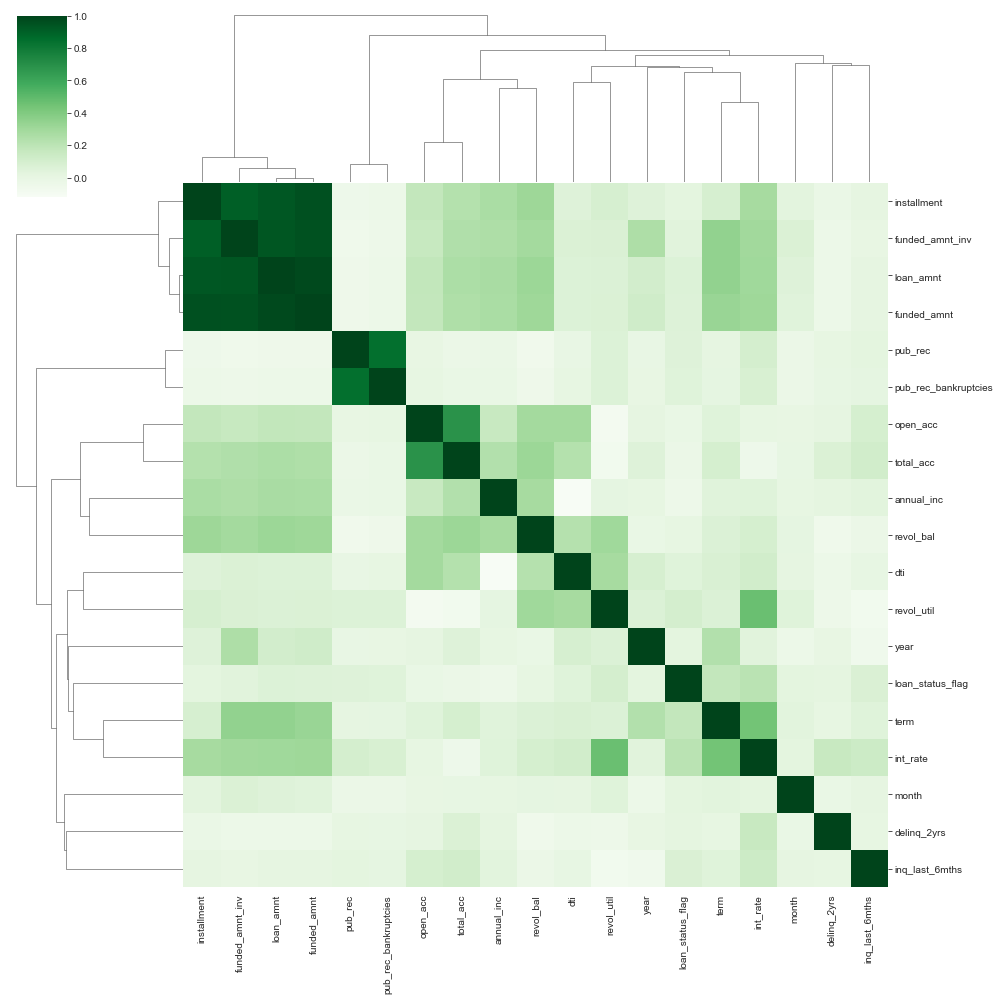

In [ ]:
sns.set_style("darkgrid")
sns.clustermap(data=df.corr(), cmap='Greens', figsize=(14,14))
plt.show()

#### Observation:
<ol>
<li>Strong correlation visible between loan_amnt, funded_amnt, funded_amnt_inv and installment. These fields are proportional to each other.</li>
<li>pub_rec & pub_rec_bankrupcies are correlated. We also see a positive correlation between public records and number of accounts opened.</li>
<li>Positive correlation also visible between int_rate and revol_util.</li>
</ol>

#### Creating Functions

In [ ]:
# Display Bar Height in Percentage in bar charts
def display_bar_height_in_percent(am):
    for z in am.containers:
        #Customize the labels
        labels = [str(v.get_height()) + '%'  if v.get_height() > 0 else '' for v in z]
        am.bar_label(z, labels=labels, label_type='center')

# Display Median in the box plot
def display_median_box_plot(box_plot):
    am = box_plot.axes
    lines = am.get_lines()
    xticks = am.get_xticks()
    for xtick in xticks:
        y = round(lines[4+xtick*6].get_ydata()[0],1) 
        am.text(xtick,y,f'{y}',ha='center', va='center', fontweight='bold', size=10,color='white')
        
def distribution(dataframe, col):
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=dataframe['loan_status'], y=dataframe[col], data=dataframe,palette='RdYlGn')
    plt.subplot(1, 2, 2)
    a = sns.distplot(dataframe[col])
    plt.suptitle('{} Amount Distribution across loan statuses'.format(col))
    plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='count'>

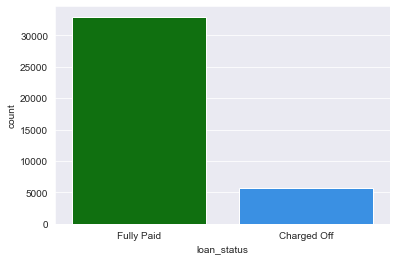

In [ ]:
sns.countplot(x = 'loan_status', data = df,palette=['green','dodgerblue'])

In [ ]:
df['sub_grade'] = df['sub_grade'].str[-1]
df['sub_grade'] = df['sub_grade'].astype('int')

<AxesSubplot:xlabel='grade', ylabel='count'>

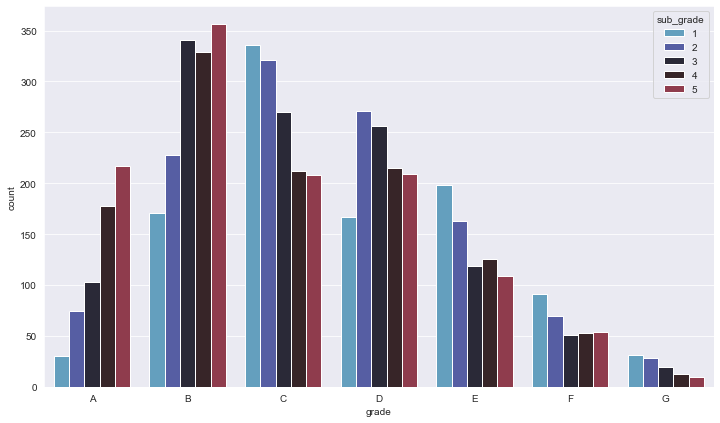

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('icefire')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = df[df.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

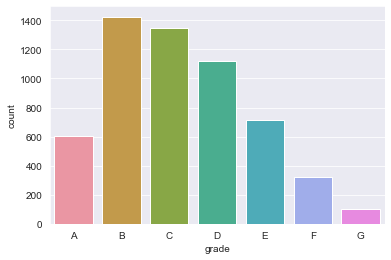

In [ ]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], data = df[df.loan_status == 'Charged Off'])

In [ ]:
def Uni_plot(x,color='c',rota=0):
    df[x].value_counts().sort_index().plot.bar(color = color)
    plt.ylabel('Loan Application Count')
    plt.xlabel('{}'.format(x))
    plt.xticks(rotation=rota)
    plt.title('Frequency Distribution of {}'.format(x))
    plt.show()
    

In [ ]:
def Uni_plot_charged_off(x,color='c',rota=0):
    df[df['loan_status']=='Charged Off'][x].value_counts().sort_index().plot.bar(color = color)
    plt.ylabel('Loan Application Count')
    plt.xlabel('{}'.format(x))
    plt.xticks(rotation=rota)
    plt.title('Frequency Distribution of {}'.format(x))
    plt.show()

#### term

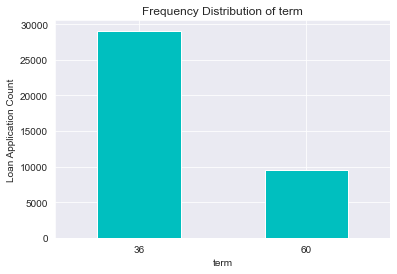

In [ ]:
Uni_plot('term')

#### Observation :
###### There is wide gap between the loan terms.  Majority of the applicants wish to opt for 36 months.
###### 

#### Term Vs Charged Off

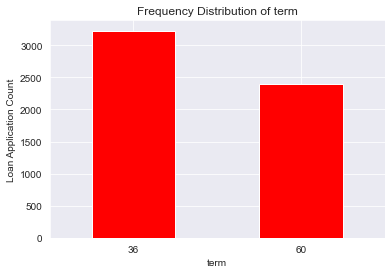

In [ ]:
Uni_plot_charged_off('term','r')

#### Observation :
###### The gap between the terms has narrowed when we analyze Charged Off. Here again we notice there are more applicants who opt for 36 months.
###### 

#### Employment Length

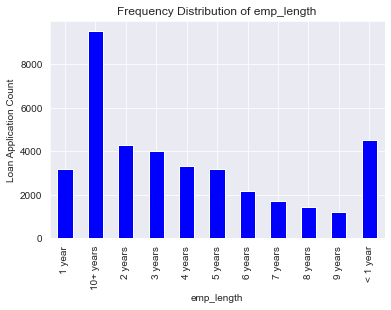

In [ ]:
Uni_plot('emp_length','b',90)

#### Observation :
###### Applicants who have either 10+ years of experience or  less than 1 tend to apply for more loans.
###### 

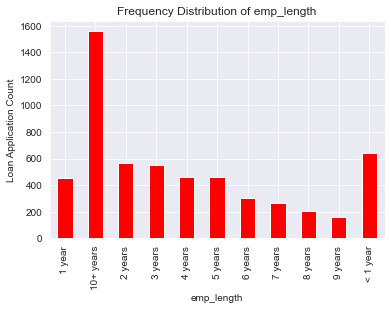

In [ ]:
Uni_plot_charged_off('emp_length','r',90)

#### Observation :
###### Comparing the two above graphs, we can see that the trend is very similar. This concludes our defaulters mostly in the 10+ years experience or less than 1.
###### 

#### Home Ownership

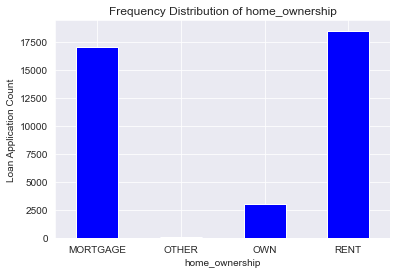

In [ ]:
Uni_plot('home_ownership','b')

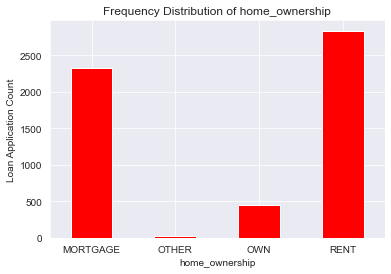

In [ ]:
Uni_plot_charged_off('home_ownership','r')

#### Observation :
###### Defaulters mojorly lie in MORTGAGE or RENT when we consider home_ownership
###### 

#### Verification Status

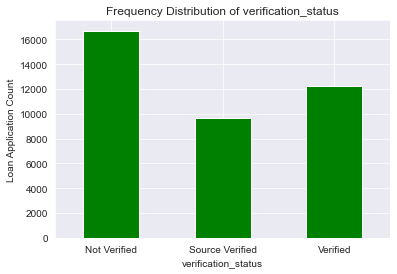

In [ ]:
Uni_plot('verification_status','g')

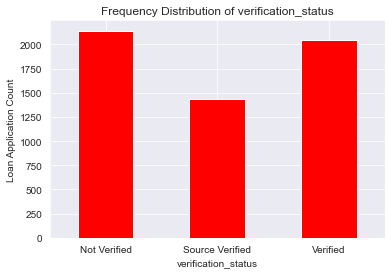

In [ ]:
Uni_plot_charged_off('verification_status','r')

#### Observation :
###### We notice that there are less defaulters when the Source is Verified.
###### 

#### Purpose

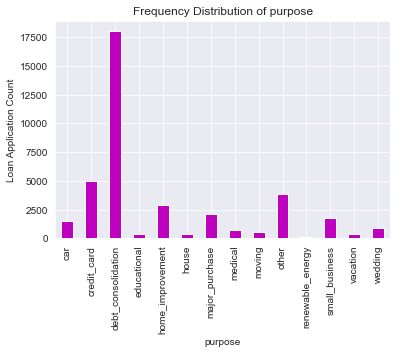

In [ ]:
Uni_plot('purpose','m',90)

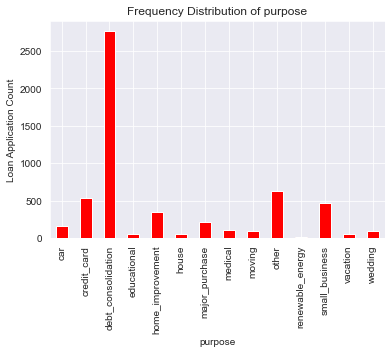

In [ ]:
Uni_plot_charged_off('purpose','r',90)

#### Observation :
###### Majority of our defaulters have their purpose as debt consolidation 
###### 

## Segmented Univariate Analysis

In [ ]:
def seg_box(y,rota=0):
    box_plot = sns.boxplot(x='loan_status',y=y,data=df,palette="Set2")
    display_median_box_plot(box_plot)
    plt.ylabel('{}'.format(y))
    plt.xlabel('Loan Status')
    plt.xticks(rotation=rota)
    plt.title('{} Distribution across loan statuses'.format(y))
    plt.show()
    

#### loan_amnt

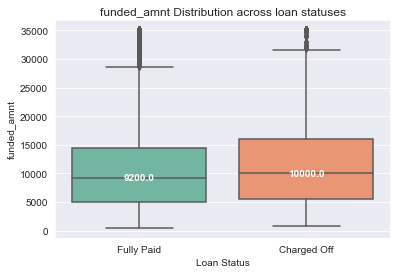

In [ ]:
seg_box('funded_amnt')

#### Observation :
###### Charged Off loan status had higher median of funded amount.  
###### 

#### Loan Amount

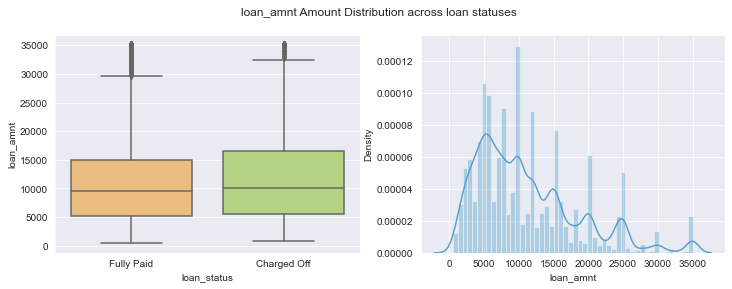

In [ ]:
distribution(df, 'loan_amnt')

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.00,12104.39,8085.73,900.00,5600.00,10000.00,16500.00,35000.00
Fully Paid,32950.00,10866.46,7199.63,500.00,5200.00,9600.00,15000.00,35000.00


In [ ]:
df.groupby('loan_status')['loan_amnt'].median()

loan_status
Charged Off   10000.00
Fully Paid     9600.00
Name: loan_amnt, dtype: float64

#### Observation :
###### We do see that the data for loan_amnt is right skewed. The mean is greater than the median. 
###### 

In [ ]:
def seg_plot(am,rota=0):
    df_1 = df.groupby([am,'loan_status'])['loan_status'].count().unstack()
    ax = df_1.apply(lambda x : round(x*100/x.sum()),axis=1).plot(kind='bar', stacked=False)
    display_bar_height_in_percent(ax)
    plt.xticks(rotation=rota)
    plt.ylabel('Loan Distribution %')
    plt.title('Loan Status Distribution across {}'.format(am))
    plt.show()
    

#### Term

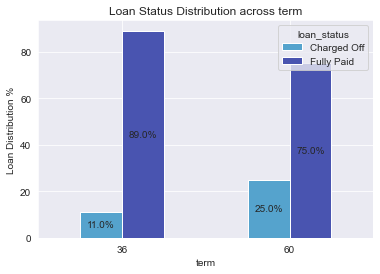

In [ ]:
seg_plot('term')

#### Observation :
###### Loan Applicants with the term 60 months are more likely to default than that of 36 months 
###### 

#### Interest Rate

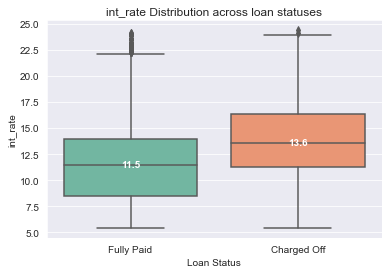

In [ ]:
seg_box('int_rate')

#### Observation :
###### Loan Applicants who got loan for higher interest rates are more likely to default than that of lower interest rates
###### 

#### Grade

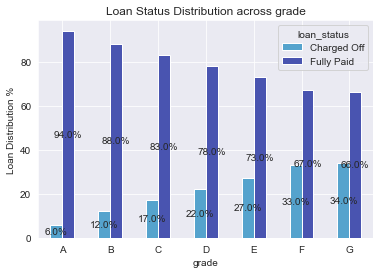

In [ ]:
seg_plot('grade')

#### Observation :
###### Loan Applicants with grades E,F,G are more likely to default than that of others. This correlates with interest rates analysis since E,F,G grades has higher interest rates
###### 

#### Employment Length 

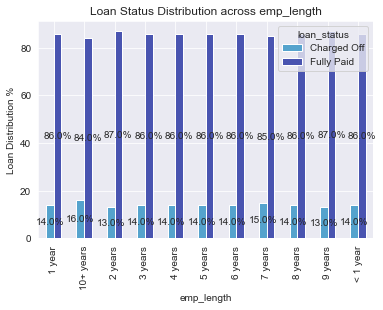

In [ ]:
seg_plot('emp_length',90)

#### Observation :
###### Loan Applicants with employment length of 10+years tend to default more.
###### 

#### Home Ownership

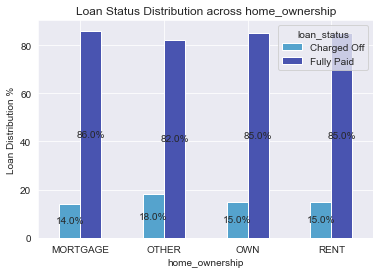

In [ ]:
seg_plot('home_ownership')

#### Observation :
###### Applicants with Home Ownership OTHER tend to default more than others
###### 

#### Annual Income

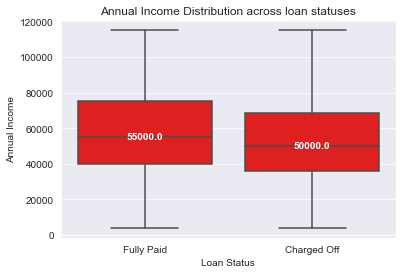

In [ ]:
# Segmented Univariate analysis using annual_inc
# Remove the outliers to make IQR visible and comparable
box_plot = sns.boxplot(x='loan_status',y='annual_inc',data=df[df.annual_inc <= df.annual_inc.quantile(0.90)],color='r')
display_median_box_plot(box_plot)
plt.ylabel('Annual Income')
plt.xlabel('Loan Status')
plt.title('Annual Income Distribution across loan statuses')
plt.show()

#### Observation :
###### Loan Applicants who has lesser Annual Income are likely to default more than that of higher annual income
###### 

#### Income Verification Status

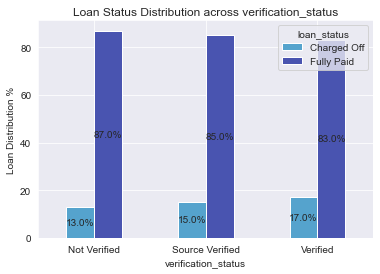

In [ ]:
seg_plot('verification_status')

#### Observation :
###### Loan Applications whose Income is verified tends to defaults more than others.
###### 

#### Purpose

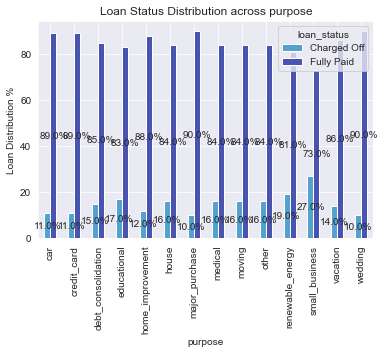

In [ ]:
seg_plot('purpose',90)

#### Observation :
###### Loan Applicants for the purpose of Small Business tend to default more than others.
###### 

### dti

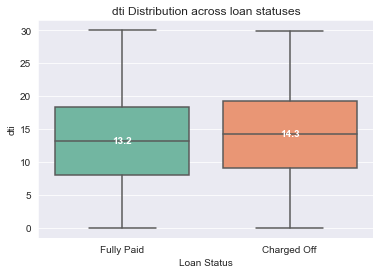

In [ ]:
seg_box('dti')

#### Observation :
###### Loan applications with higher debt to income ratio likely to default.
###### 

#### Revolving Credit Utilization

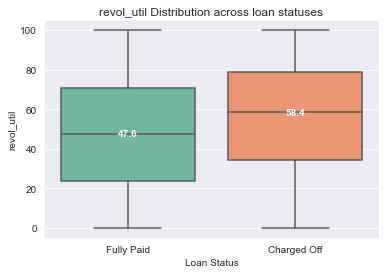

In [ ]:
seg_box('revol_util')

#### Observation :
###### Loan Applications with higher revolving credit utilization tend to default the loan than others
###### 

## Bivariate Analysis

#### Loan Amount vs Funded Amount

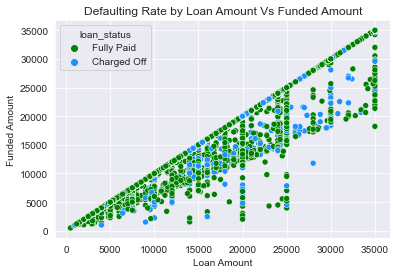

Fully Paid    0.86
Charged Off   0.14
Name: loan_status, dtype: float64


In [ ]:
ax = sns.scatterplot(x='loan_amnt',y='funded_amnt',data=df,hue='loan_status',palette=['green','dodgerblue'])
ax.set(xlabel='Loan Amount',ylabel='Funded Amount',title='Defaulting Rate by Loan Amount Vs Funded Amount')
plt.show()

print(df[df['loan_amnt']==df['funded_amnt']]['loan_status'].value_counts(normalize=True))

#### Observation :
###### There are very less defaulters when Funded Amount is same as the Loan Amount. Only 14% have turned out to be Defaulters. 
###### 

In [ ]:
def bivariate_plot(x,y):
    
    df_1 = df.groupby([x,y,'loan_status'])['loan_status'].count().unstack()
    df_1 = df_1.apply(lambda x : round(x*100/x.sum()),axis=1)
    df_1.drop(columns='Fully Paid',inplace=True)
    df_2 = df_1.unstack()
    df_2.columns = df_2.columns.droplevel()
    ax = sns.heatmap(df_2, annot=True,cmap=sns.cm.rocket_r,cbar_kws={'label': 'defaulters %'})
    ax.set(xlabel=y, ylabel=x, title='Defaulters % w.r.t {} and {}'.format(y.replace("_"," "),x.replace("_"," ")))
    plt.show()

#### Term vs Employment Length

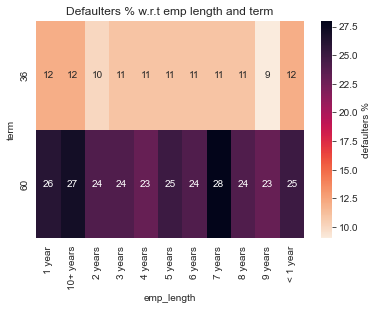

In [ ]:
bivariate_plot('term','emp_length')

#### Observation :
###### Loan Applicants with employment length of 7 years and NA values tend to default more when the term of the loan is 60 months
###### 

#### Term vs Home Ownership

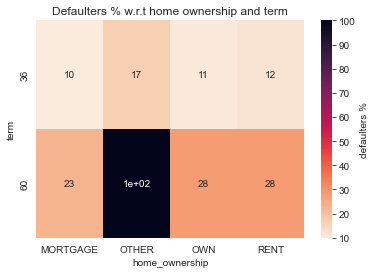

In [ ]:
bivariate_plot('term','home_ownership')

#### Observation :
###### Loan Applicants with term as 60 months and Home Ownership as OTHER default more likely
###### 

#### Term vs Verification Status

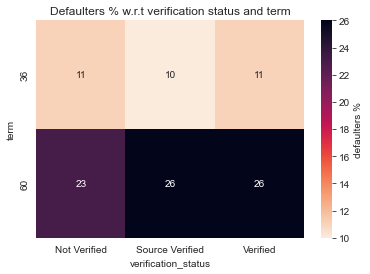

In [ ]:
bivariate_plot('term','verification_status')

#### Observation :
###### Loan Applications with term as 60 months and their income verified and source verified tend to default more likely than others
###### 

#### Term vs Purpose

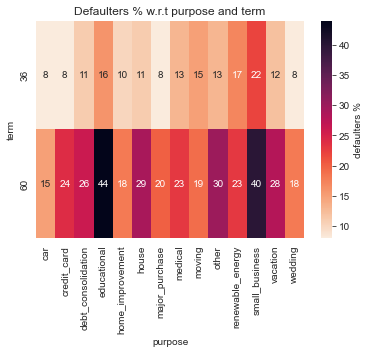

In [ ]:
bivariate_plot('term','purpose')

#### Observation :
###### Loan Applicants with term as 60 months are more likely to default when the purpose is educational and small business
###### 

#### Term vs revol_bal

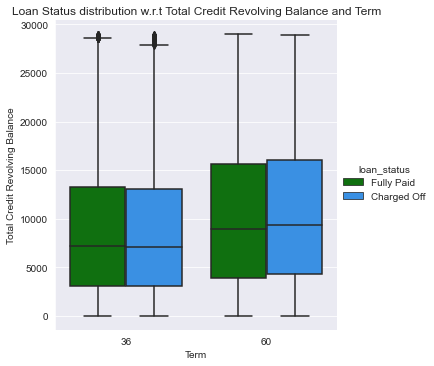

In [ ]:
df_1 = df[df.revol_bal <= df.revol_bal.quantile(0.90)] # Remove Outliers
ax = sns.catplot(x='term',y='revol_bal',data=df_1,hue='loan_status',kind='box',palette=['green','dodgerblue'])
ax.set(xlabel='Term',ylabel='Total Credit Revolving Balance',title='Loan Status distribution w.r.t Total Credit Revolving Balance and Term')
plt.show()

#### Observation :
###### Loan Applicants with higher Total Credit Revolving Balance tend to default likely when the term is 60 months
###### 

#### Emp Length vs Home Ownership

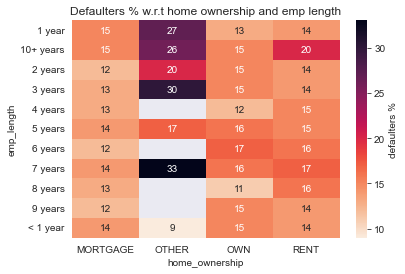

In [ ]:
bivariate_plot('emp_length','home_ownership')

#### Observation :
###### Loan Applicants with OTHER home ownership tend to default more when their employment length is 3 years or 7 years.
###### 

#### Emp Length vs Purpose

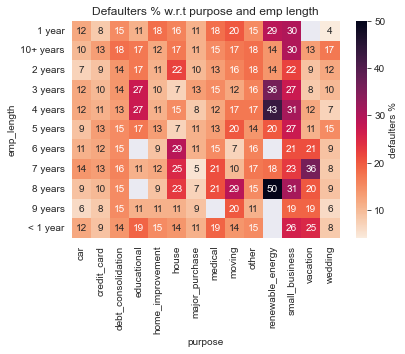

In [ ]:
bivariate_plot('emp_length','purpose')

#### Observation :
###### Loan Applicants for purpose as renewable energy tend to likely default when their employment length is 4 years or 8 years. Also, Loan Applicants with no employment length specified tend to default more for educational purpose
##### 

#### Home ownership vs Purpose

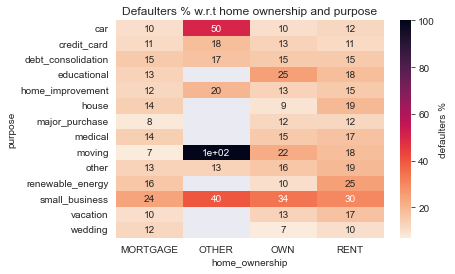

In [ ]:
bivariate_plot('purpose','home_ownership')

#### Observation:
##### Loan Applicants for the purpose of small business tend to default more across RENT, OWN and OTHER home ownerships. Also, Car - OTHER combination seem to default likely